# 로지스틱 회귀를 이용한 개인신용평가

## 데이터 설명
- 독일 금융기관의 개인 신용평가 데이터 집합은 32개의 변수와 1000개의 레코드로 구성된다. 
- 각 신용대출 신청자는 '신용우량' 또는 '신용불량'으로 평가되었다.
- 신규 신용대출 신청자들에 대한 신용위험을 평가하기 위해 주어진 변수를 활용한다.
- 출처:https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

## 변수 설명표

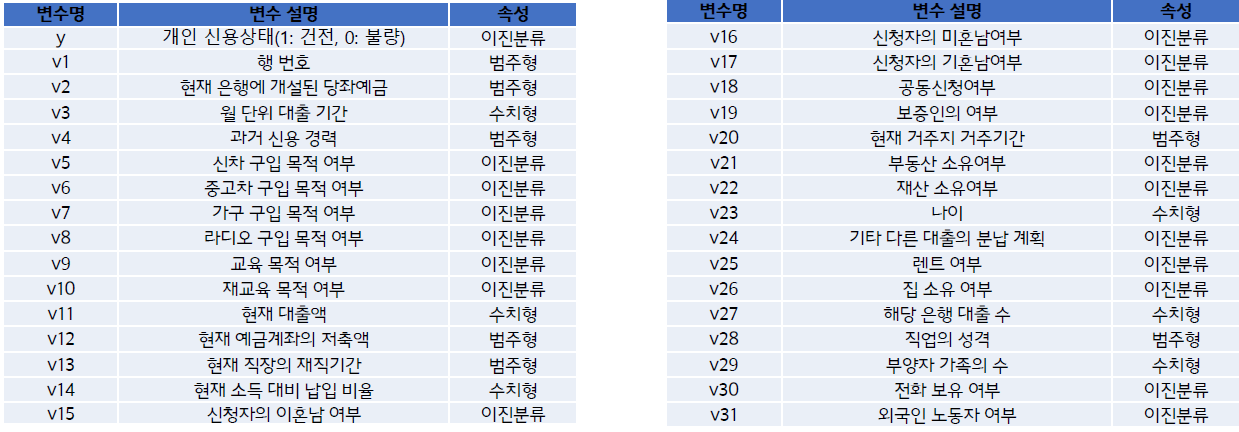

## 데이터 불러오기 & 구조 파악하기

In [36]:
import pandas as pd
gc_df=pd.read_csv("German_Credit.csv")

In [37]:
gc_df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
0,1,1,0,6,4,0,0,0,1,0,...,0,67.0,0,0,1,2,2,1,1,0
1,0,2,1,48,2,0,0,0,1,0,...,0,22.0,0,0,1,1,2,1,0,0
2,1,3,3,12,4,0,0,0,0,1,...,0,49.0,0,0,1,1,1,2,0,0
3,1,4,0,42,2,0,0,1,0,0,...,0,45.0,0,0,0,1,2,2,0,0
4,0,5,0,24,3,1,0,0,0,0,...,1,53.0,0,0,0,2,2,2,0,0


In [38]:
# 데이터 형식 파악
gc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   int64  
 1   X1      1000 non-null   int64  
 2   X2      1000 non-null   int64  
 3   X3      1000 non-null   int64  
 4   X4      1000 non-null   int64  
 5   X5      1000 non-null   int64  
 6   X6      1000 non-null   int64  
 7   X7      1000 non-null   int64  
 8   X8      1000 non-null   int64  
 9   X9      1000 non-null   int64  
 10  X10     1000 non-null   int64  
 11  X11     1000 non-null   int64  
 12  X12     1000 non-null   int64  
 13  X13     996 non-null    float64
 14  X14     1000 non-null   int64  
 15  X15     1000 non-null   int64  
 16  X16     1000 non-null   int64  
 17  X17     1000 non-null   int64  
 18  X18     1000 non-null   int64  
 19  X19     1000 non-null   int64  
 20  X20     1000 non-null   int64  
 21  X21     1000 non-null   int64  
 22  X

#### 결측치가 존재한다는 것을 알 수 있다

In [39]:
# 기초 통계량 파악
gc_df.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,996.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,500.500000,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,...,0.154000,35.574297,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000
std,0.458487,288.819436,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,...,0.361129,11.388238,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,250.750000,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,500.500000,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000
75%,1.000000,750.250000,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
max,1.000000,1000.000000,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000


### 결측치 처리

In [40]:
# 결측치 확인
gc_df.isnull().sum()

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    4
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    4
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
dtype: int64

In [41]:
# dropna()를 이용해서 결측치를 제거
gc_df=gc_df.dropna()

In [42]:
# 다시 결측치 확인
gc_df.isnull().sum().sum()

0

### 데이터 시각화하기
- 납입율과 신용여부를 파악하기 위해 현재 소득 대비 납입 비율 ~ 신용여부 시각화
- 나이와 신용상태와의 관계를 파악하기 위한 시각화

In [43]:
import seaborn as sns

<AxesSubplot:xlabel='X14', ylabel='count'>

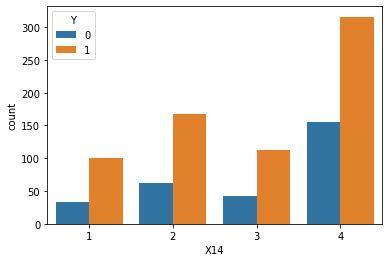

In [44]:
sns.countplot(x='X14',hue='Y',data=gc_df)

<AxesSubplot:xlabel='Y', ylabel='X23'>

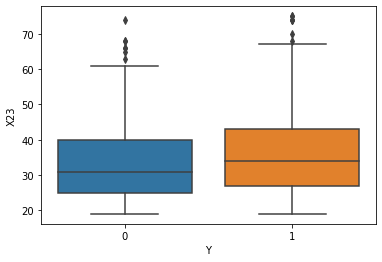

In [45]:
sns.boxplot(x='Y',y='X23',data=gc_df)

## 로짓모델 구축 & 평가

In [46]:
# id 제거
gc_df=gc_df.drop(columns="X1")

In [47]:
# train_test_split
from sklearn.model_selection import train_test_split

X_data=gc_df.drop(columns="Y")
y_data=gc_df['Y']
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2,random_state=1)

In [48]:
print('train에서의 불량 비율:',sum(y_train)/800)
print('test에서의 불량 비율:',sum(y_test)/200)

train에서의 불량 비율: 0.6925
test에서의 불량 비율: 0.715


- 0.7 근처로 잘 분배되었음을 확인함

### 모델 구축

In [49]:
# 로짓 모델
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression() # 로짓모델 만들기
lr.fit(X_train,y_train) # 학습시키기

pred_lr=lr.predict(X_test) # 예측하기

C:\Users\sungb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 평가하기

In [50]:
pred_lr

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_lr)

0.7638190954773869

In [53]:
pd.DataFrame(lr.predict_proba(X_test))

,0,1
0,0.584870,0.415130
1,0.636614,0.363386
2,0.378707,0.621293
3,0.056306,0.943694
4,0.049088,0.950912
...,...,...
194,0.284424,0.715576
195,0.187808,0.812192
196,0.471348,0.528652
197,0.163351,0.836649
